In [ ]:
!wget -O clock0400.png https://cdn.discordapp.com/attachments/628965994156785694/1176402324831350876/clock0400.png
!wget -O clock0900.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325091401888/clock0900.png
!wget -O clock0910.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325364035696/clock0910.png
!wget -O clock1000.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325586325535/clock1000.png
!wget -O Oil.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325888319578/Oil.png

--2023-11-21 14:43:55--  https://cdn.discordapp.com/attachments/628965994156785694/1176402324831350876/clock0400.png
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.135.233, 162.159.130.233, 162.159.129.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.135.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16725 (16K) [image/png]
Saving to: ‘clock0400.png’

clock0400.png       100%[===================>]  16.33K  --.-KB/s    in 0s      

2023-11-21 14:43:55 (93.1 MB/s) - ‘clock0400.png’ saved [16725/16725]

--2023-11-21 14:43:55--  https://cdn.discordapp.com/attachments/628965994156785694/1176402325091401888/clock0900.png
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.135.233, 162.159.130.233, 162.159.129.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.135.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15727 (15K) [image/png]
Saving to: ‘clock0900.png’

clock0

# Question 1

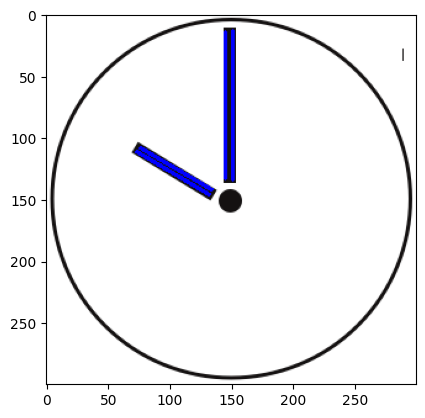

Detected time: 10:00


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


def detect_hands_and_calculate_time(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Make circle mask
    m,n,_ = img.shape
    m,n = m//2,n//2
    mask1,mask2 = np.ones_like(gray),np.ones_like(gray)
    cv2.circle(mask1,(m,n),140,0,-1)
    cv2.circle(mask1,(m,n),15,1,-1)

    # Threshold
    _,gray = cv2.threshold(gray,128,1,cv2.THRESH_BINARY)

    # Dilate the white area to make clock hand thinner
    kernel = np.ones((5, 5), np.uint8)
    gray = cv2.dilate(gray, kernel, iterations=1)

    # Apply mask
    gray = cv2.bitwise_or(mask1,gray)

    # Apply Canny to detect the edge
    edges = cv2.Canny(gray, 0, 1, apertureSize=3)

    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=40, minLineLength=30, maxLineGap=5)

    # Assuming the longest line is the minute hand and second longest is the hour hand
    if lines is not None:
        lines = sorted(lines, key=lambda x: np.linalg.norm(x[0][:2] - x[0][2:4]), reverse=True)
        minute_hand = lines[0][0]

        if len(lines) > 3:
          hour_hand = np.array([(lines[2][0][0] + lines[3][0][0])/2, (lines[2][0][1] + lines[3][0][1])/2, (lines[2][0][2] + lines[3][0][2])/2, (lines[2][0][3] + lines[3][0][3])/2])
        elif len(lines) > 2:
          hour_hand = lines[len(lines) - 1][0]
        else:
          hour_hand = None

        # Calculate angles and time
        center = (img.shape[0] // 2, img.shape[1] // 2)
        minute_angle = calculate_angle(minute_hand, center)
        hour_angle = calculate_angle(hour_hand, center) if hour_hand is not None else None

        minute = math.floor(minute_angle / 360 * 60) % 60
        hour = math.ceil(hour_angle / 360 * 12) if hour_angle is not None else None

        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

        plt.imshow(img)
        plt.show()
        return hour, minute
    else:

        plt.imshow(img)
        plt.show()
        return None, None

def calculate_angle(line, center):
    x1, y1, x2, y2 = line
    x = x2 - 150
    y = y2 - 152
    angle = math.atan( abs(x) / abs(y) )
    angle = np.degrees(angle)

    if x < 0 and y >= 0:
      angle = 180 + angle
    elif x < 0 and y < 0:
      angle = 360 - angle
    elif x >= 0 and y >= 0:
      angle = 180 - angle

    return angle

hour, minute = detect_hands_and_calculate_time('clock1000.png')
if hour is not None and minute is not None:
    print(f"Detected time: {hour}:{minute:02d}")
else:
    print("Could not detect clock hands")

# Question 3.1

<ipython-input-31-3396ec03108d>:11: RuntimeWarning: divide by zero encountered in log
  img_log = (np.log(image + 1)/(np.log(1 + np.max(image)))) * 255


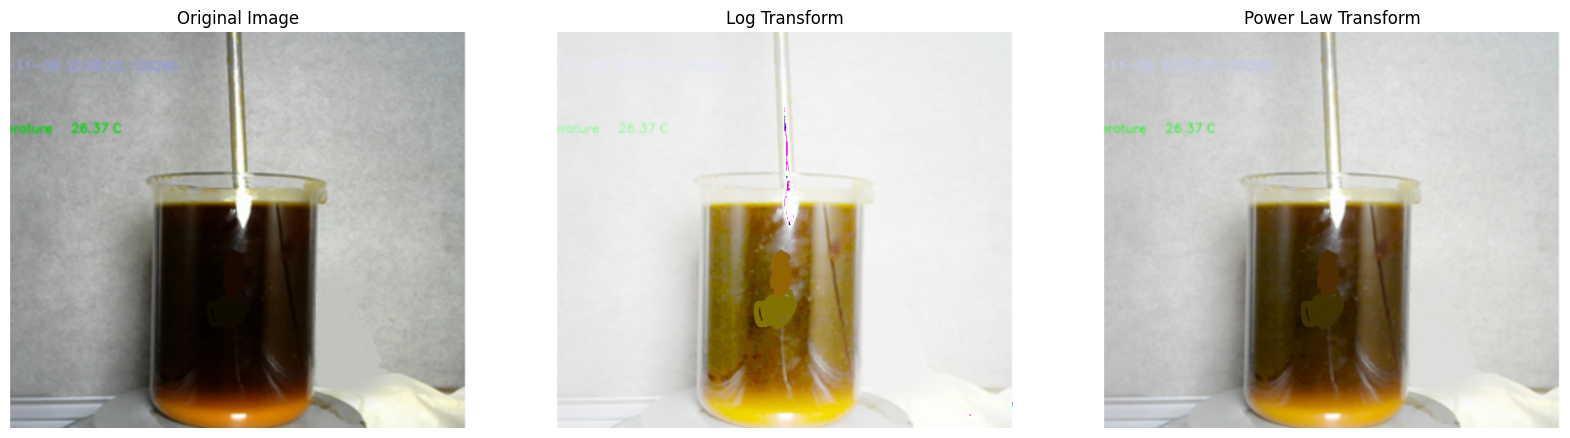

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Oil.png', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply log transform for image enhancement
img_log = (np.log(image + 1)/(np.log(1 + np.max(image)))) * 255
img_log = np.array(img_log, dtype=np.uint8)

# Apply gamma correction for power law transform
gamma = 0.5
img_gamma = np.array(255*(image / 255) ** gamma, dtype='uint8')

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(img_log)
ax[1].set_title('Log Transform')
ax[1].axis('off')
ax[2].imshow(img_gamma)
ax[2].set_title('Power Law Transform')
ax[2].axis('off')

plt.show()

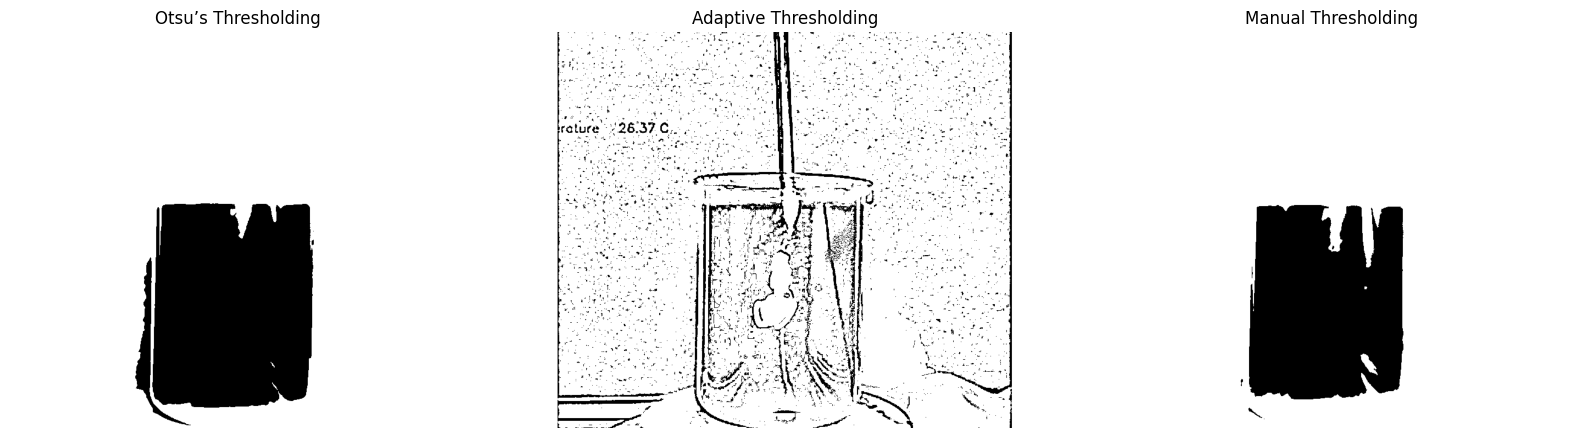

In [18]:
from skimage.filters import threshold_otsu
from skimage import measure
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Using power-law image and convert to grayscale
gray_power_law = cv2.cvtColor(img_gamma, cv2.COLOR_RGB2GRAY)

# Apply Otsu's thresholding
thresh_val_otsu = threshold_otsu(gray_power_law)
otsu_mask = gray_power_law > thresh_val_otsu

# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_power_law, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Manual Thresholding - we select a threshold value that might be suitable
manual_thresh_value = 100
_, manual_mask = cv2.threshold(gray_power_law, manual_thresh_value, 255, cv2.THRESH_BINARY)

# Display the segmentation results
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(otsu_mask, cmap='gray')
ax[0].set_title('Otsu’s Thresholding')
ax[0].axis('off')
ax[1].imshow(adaptive_thresh, cmap='gray')
ax[1].set_title('Adaptive Thresholding')
ax[1].axis('off')
ax[2].imshow(manual_mask, cmap='gray')
ax[2].set_title('Manual Thresholding')
ax[2].axis('off')

plt.show()

In [23]:
def segment_dark_area(image_binary, image_rgb):
  # Find the contours of the dark area.
  contours, _ = cv2.findContours(image_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  areaArray = []

  #   print(contours)
  for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    areaArray.append(area)

  sorteddata = sorted(zip(areaArray, contours), key=lambda x:x[0], reverse=True)

  # Find the largest contour.
  largest_contour = sorteddata[1][1]

  # Draw a rectangle around the largest contour.
  x, y, w, h = cv2.boundingRect(largest_contour)
  cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

  # Calculate the height of the rectangle.
  height = h
  width = w

  return image_rgb, height, width

In [36]:
def volumeCal(height_pixel,width_pixel):
    cm_per_pix = 18 / width_pixel
    width_cm = 18
    height_cm = cm_per_pix * height_pixel
    volumn = np.pi * (width_cm/2)**2 * height_cm
    return volumn, width_cm, height_cm

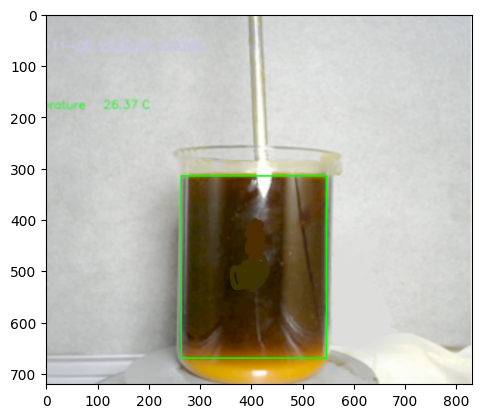

The volume is 5745.78 cm3
Width is 18.00 cm
Height is 22.58 cm


In [43]:
img_con = np.copy(img_gamma)
im, height_pixel, width_pixel = segment_dark_area(manual_mask,img_con)
plt.imshow(im)
plt.show()

print(f"The volume is {volumeCal(height_pixel,width_pixel)[0]:.2f} cm3")
print(f"Width is {volumeCal(height_pixel,width_pixel)[1]:.2f} cm")
print(f"Height is {volumeCal(height_pixel,width_pixel)[2]:.2f} cm")

# Question 3.2

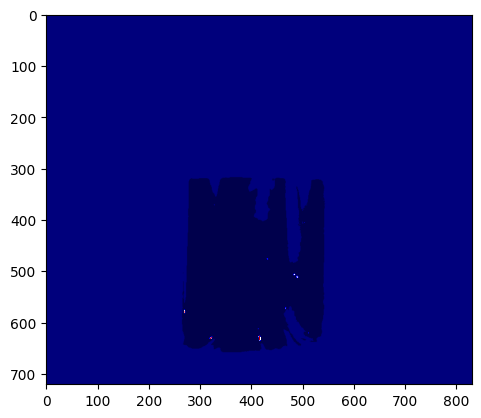

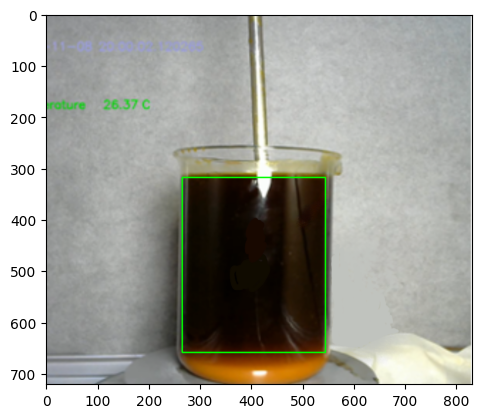

The volume is 5598.32 cm3
Width is 18.00 cm
Height is 22.00 cm


In [59]:
img_concom_rgb = cv2.imread('Oil.png', cv2.IMREAD_COLOR)
img_concom = cv2.cvtColor(img_concom_rgb, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(img_concom,28,255,cv2.THRESH_BINARY)

# Connectivity type
connectivity = 4

# Get Connected Components With Stats
output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)

# The the labels matrix
labels = output[1]

# The the stat matrix
stats = output[2]

# Sort the component to get second largest component
sortedstat = sorted(stats, key=lambda x: x[4], reverse=True)

# Get w, y, w, h of the second largest component
x,y,w,h,_ = sortedstat[1]

# Draw the rectangle
cv2.rectangle(img_concom_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show lables image
plt.imshow(labels, cmap="seismic")
plt.show()

# Show result image
plt.imshow(cv2.cvtColor(img_concom_rgb, cv2.COLOR_BGR2RGB))
plt.show()

print(f"The volume is {volumeCal(h,w)[0]:.2f} cm3")
print(f"Width is {volumeCal(h,w)[1]:.2f} cm")
print(f"Height is {volumeCal(h,w)[2]:.2f} cm")